<a href="https://colab.research.google.com/github/tiwari0809/Guvi_task/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


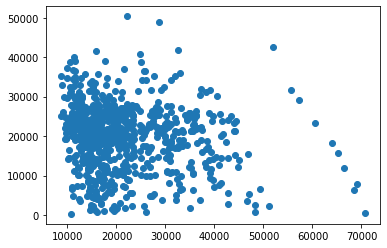

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


In [5]:
plt.scatter(df['Price'], df['Mileage'])
plt.show()
df[['Price','Mileage']].corr()


* There is no linear relationship between price and mileage therefore transformation required.

In [6]:
df['Transformed1']= np.cos(df['Mileage'])

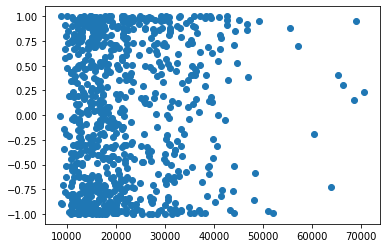

,Price,Transformed1
Price,1.000000,0.078047
Transformed1,0.078047,1.000000


In [7]:
plt.scatter(df['Price'], df['Transformed1'])
plt.show()
df[['Price','Transformed1']].corr()

* Even after tranformation there is no linear relation between Mileage and Price.

In [8]:
X = df[['Mileage']].values #array of features
y = df['Price'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [9]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
print(regressor.intercept_) # c
print(regressor.coef_) # m


21351.588889500566
[-1305.59962684]


In [12]:
y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
y_pred

array([20715.97083065, 20936.20835757, 21123.34660298, 22337.83562423,
       20914.88478198, 21322.73794779, 20100.76976197, 19085.19469205,
       23518.58883933, 24445.6869837 , 20363.49530889, 21013.38697068,
       20821.31565928, 23277.50513032, 21764.64518207, 20721.0630278 ,
       20908.04214206, 22069.38135551, 21670.75779704, 21087.22382942,
       22227.71686077, 21051.89671166, 20325.14469907, 20756.39014556,
       20942.73273517, 20021.52244376, 20869.69153224, 20412.03031302,
       22699.85901565, 21403.73570877, 20549.8378985 , 21512.7405541 ,
       20819.40608534, 22137.64862361, 20921.56829075, 21756.84775518,
       23593.85787852, 23045.81015981, 22632.86479684, 21954.96605071,
       22763.19321776, 24390.15020849, 21163.60678673, 20449.26700471,
       21429.19669455, 19858.41300367, 24062.34001669, 20275.65490798,
       20348.85524207, 20585.32414742, 22262.24832272, 21401.1896102 ,
       22913.73129612, 21633.20284303, 23210.51091151, 23755.21687584,
      

In [13]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1


,Actual,Predicted
0,14862.093870,20715.970831
1,16256.236168,20936.208358
2,15802.652861,21123.346603
3,45061.951935,22337.835624
4,12425.389171,20914.884782
...,...,...
76,17542.036083,23084.797294
77,15623.919765,21153.422392
78,21607.772566,22777.037629
79,17839.800771,20488.095008


In [14]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.04569265286866264


* Very poor R2-Value.


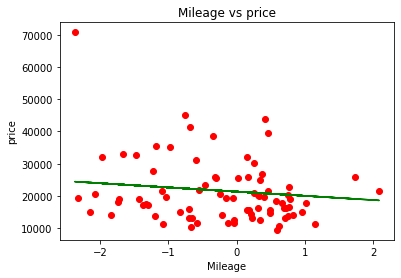

In [15]:
plt.scatter(X_test_scaled, y_test, color = "red")
plt.plot(X_test_scaled, y_pred, color = "green")
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show()


Task 2

* Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [16]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed1
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,-0.853582
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.730709
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.257024
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0.844597
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,-0.641440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,0.892631
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.921119
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,0.685214
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,-0.389832


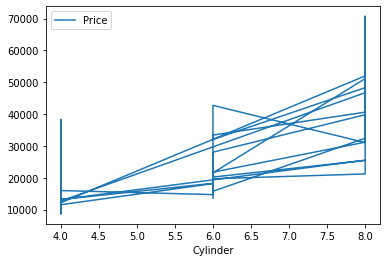

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [17]:
df.plot('Cylinder', 'Price')
plt.show()
df[['Cylinder','Price']].corr()

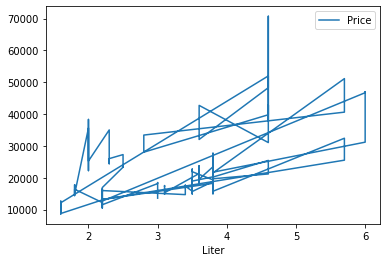

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [18]:
df.plot('Liter', 'Price')
plt.show()
df[['Liter','Price']].corr()


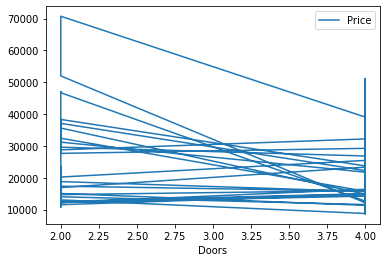

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [19]:
df.plot('Doors', 'Price')
plt.show()
df[['Doors','Price']].corr()

In [20]:
df['log_doors']= np.exp(df['Doors'])

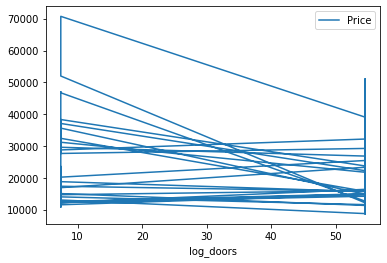

,log_doors,Price
log_doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [21]:
df.plot('log_doors', 'Price')
plt.show()
df[['log_doors','Price']].corr()

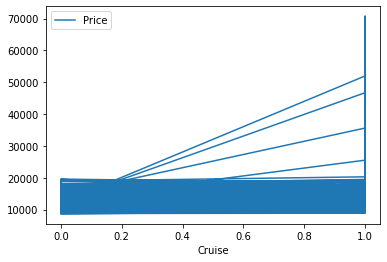

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [22]:
df.plot('Cruise', 'Price')
plt.show()
df[['Cruise','Price']].corr()


In [23]:
df['trans_sound']= np.sin(df['Sound'])


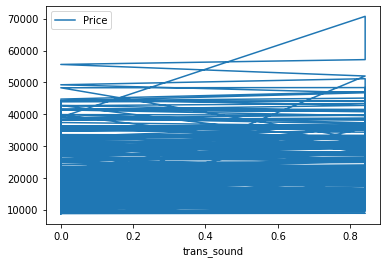

,trans_sound,Price
trans_sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [24]:
df.plot('trans_sound', 'Price')
plt.show()
df[['trans_sound','Price']].corr()


In [25]:
df['leather1']= np.exp(df['Leather'])


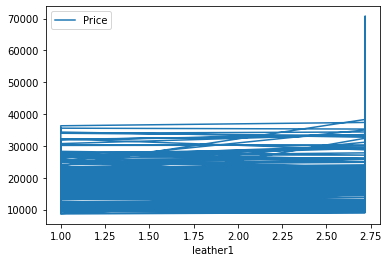

,leather1,Price
leather1,1.000000,0.157197
Price,0.157197,1.000000


In [26]:
df.plot('leather1', 'Price')
plt.show()
df[['leather1','Price']].corr()


* There is a linear relation between (Price, Cylinder) and (Price, Liter) and (Price, Cruise). No transformation required in these.

In [27]:
X = df[['Cylinder', 'Liter', 'Cruise', 'Doors','Sound', 'Mileage']].values #array of features
y = df['Price'].values #array of targets


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [29]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 


In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [31]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Cylinder,3336.332691
Liter,848.919079
Cruise,2550.519418
Doors,-1047.036082
Sound,-666.164187
Mileage,-1500.478247


In [32]:
regressor.intercept_ # c 


21034.11410660531

In [33]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
0,33220.028446,31228.073008
1,34355.003728,20595.414623
2,34739.214960,33465.389383
3,11080.516378,8899.542963
4,16341.804099,16927.520032
...,...,...
237,14702.798320,20759.963467
238,23329.208256,18576.540705
239,14997.884336,14059.337514
240,39092.189918,34794.391063


1. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [34]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.421482465783517


1. Find the combination of the factors that is the best predictor for price
According to the coefficients of the features Cylinder, Cruise and Mileage are the best features to predict the price of car.

* Find the best combination of factors to predict price.


In [35]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'],selector.support_))


[('Cylinder', True),
 ('Liter', False),
 ('Cruise', True),
 ('Doors', False),
 ('Sound', False),
 ('Mileage', True)]

* Cylinder, Cruise and Mileage are the best features.